# Procrastinate Pro+

### Задача

разобраться в причинах убытков и помочь компании выйти в плюс.

### Описание

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

лог сервера с данными об их посещениях,

выгрузка их покупок за этот период,

рекламные расходы.

#### Предстоит изучить:

откуда приходят пользователи и какими устройствами они пользуются,

сколько стоит привлечение пользователей из различных рекламных каналов;

сколько денег приносит каждый клиент,

когда расходы на привлечение клиента окупаются,

какие факторы мешают привлечению клиентов.

#### Структура visits_info_short.csv:

User Id — уникальный идентификатор пользователя,

Region — страна пользователя,

Device — тип устройства пользователя,

Channel — идентификатор источника перехода,

Session Start — дата и время начала сессии,

Session End — дата и время окончания сессии.

#### Структура orders_info_short.csv:

User Id — уникальный идентификатор пользователя,

Event Dt — дата и время покупки,

Revenue — сумма заказа.

#### Структура costs_info_short.csv:

dt — дата проведения рекламной кампании,

Channel — идентификатор рекламного источника,

costs — расходы на эту кампанию.

#### Ход исследования:

Шаг 1. Загрузка данных и подготовка их к анализу

Шаг 2. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии

Шаг 3. Исследовательский анализ данных

Шаг 4. Маркетинговый анализ

Шаг 5. Оценка окупаемости рекламы

Шаг 6. Вывод

### 1. Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('/Users/666/Documents/Data Analysis/Проекты/df/visits_info_short.csv')
    orders = pd.read_csv('/Users/666/Documents/Data Analysis/Проекты/df/orders_info_short.csv')
    costs = pd.read_csv('/Users/666/Documents/Data Analysis/Проекты/df/costs_info_short.csv')

#### Изучаю данные

In [3]:
display(visits.head())
visits.info()
visits.duplicated().sum()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


0

In [4]:
display(orders.head())
orders.info()
orders.describe()
orders.duplicated().sum()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


0

In [5]:
display(costs.head())
costs.info()
costs.describe()
costs.duplicated().sum()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


0

#### Предобработка

In [6]:
visits.columns=[i.lower().replace(' ', '_') for i in visits.columns]

visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [7]:
orders.columns=[i.lower().replace(' ', '_') for i in orders.columns]

orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [8]:
costs.columns=[i.lower().replace(' ', '_') for i in costs.columns]

costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [9]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

### 2. Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии

#### Функция для создания пользовательских профилей

In [10]:
def get_profiles(sessions, orders, ad_costs):
    
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
   
    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles

#### Функция для расчета удержания(Retention Rate)

In [11]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):
    
    dimensions = ['payer'] + dimensions
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    def group_by_dimensions(df, dims, horizon_days): #функция для группировки по признакам
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
        
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return result_raw, result_grouped, result_in_time 

#### Функция для расчета конверси

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
        
    def group_by_dimensions(df, dims, horizon_days): #функция для группировки по признакам
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    if 'cohort' in dimensions: 
        dimensions = []
    
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return result_raw, result_grouped, result_in_time

#### Функция для расчета LTV и ROI

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    def group_by_dimensions(df, dims, horizon_days): #функция для группировки по признакам
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        
        return result, roi
    
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    
    if 'cohort' in dimensions:
        dimensions = []
    
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return (
    result_raw,  
    result_grouped,  
    result_in_time,  
    roi_grouped,  
    roi_in_time) 

#### Функция для сглаживания датафрейма по скользящему среднему

In [14]:
def filter_data(df, window):
    
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
        
    return df

#### Функция для построения графиков расчета удержания(Retention Rate)

In [15]:
def plot_retention(retention, retention_history, horizon, window=7):
    
    plt.figure(figsize=(15, 10))
    
    retention = retention.drop(columns=['cohort_size', 0])
    
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
        
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))
    
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

#### Функция для построения графиков конверсии

In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):
    
    plt.figure(figsize=(15, 5))
    
    conversion = conversion.drop(columns=['cohort_size'])
    
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

#### Функция для построения графиков LTV и ROI

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    
    plt.figure(figsize=(25, 15))
    
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    
    cac_history = roi_history[['cac']]
    
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

### 3. Исследовательский анализ данных

#### Составляю профили пользователей

In [18]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


#### Определяю минимальную и максимальную даты привлечения пользователей

In [19]:
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max()
print('Минимальная дата привлечения:', min_analysis_date,
      '\nМаксимальная дата привлечения:', max_analysis_date)

Минимальная дата привлечения: 2019-05-01 
Максимальная дата привлечения: 2019-10-27


#### Строю таблицу, отражающую количество пользователей и долю платящих из каждой страны

In [20]:
print(
    profiles.groupby('region')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='payer', ascending=False)
)

               user_id     payer
region                          
United States   100002  0.069019
Germany          14981  0.041119
UK               17575  0.039829
France           17450  0.037994


Наибольшее количество пользователей, в том числе платящих находится в США

#### Строю таблицу,отражающую количество пользователей и долю платящих для каждого устройства.

In [21]:
print(
    profiles.groupby('device')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='payer', ascending=False)
)

         user_id     payer
device                    
Mac        30042  0.063644
iPhone     54479  0.062079
Android    35032  0.058518
PC         30455  0.050468


Лидером по платформам является Mac, но можно выделить все 'яблочные' устройства

#### Строю таблицу,отражающую количество пользователей и долю платящих для каждого канала привлечения

In [22]:
print(
    profiles.groupby('channel')
    .agg({'user_id':'nunique', 'payer':'mean'})
    .sort_values(by='payer', ascending=False)
)

                    user_id     payer
channel                              
FaceBoom              29144  0.122049
AdNonSense             3880  0.113402
lambdaMediaAds         2149  0.104700
TipTop                19561  0.096007
RocketSuperAds         4448  0.079137
WahooNetBanner         8553  0.052964
YRabbit                4312  0.038265
MediaTornado           4364  0.035747
LeapBob                8553  0.030633
OppleCreativeMedia     8605  0.027077
organic               56439  0.020553


FaceBoom обладает наибольшим количеством пользователей, в том числе платящих.

TipTop же хоть и входит в топ-3 по общему количеству пользователей, по платящим клиентам до тройки не дотягивает

### 4. Маркетинговый анализ

#### Считаю общую сумму расходов на маркетинг

In [23]:
print(
    'Сумма расходов на маркетинг',
    costs['costs'].sum().round(2)
)

Сумма расходов на маркетинг 105497.3


Сумма расходов на маркетинг равна 105 497 $

#### Считаю сколько денег было потрачено на каждый рекламный источник

In [24]:
print(
    costs.groupby('channel')
    .agg({'costs':'sum'})
    .sort_values(by='costs', ascending=False)
)

                       costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22


Наибольшее количество денег было потрачено на TipTop и FaceBoom

#### Строю визуализацию динамики изменения расходов во времени (по неделям и месяцам)

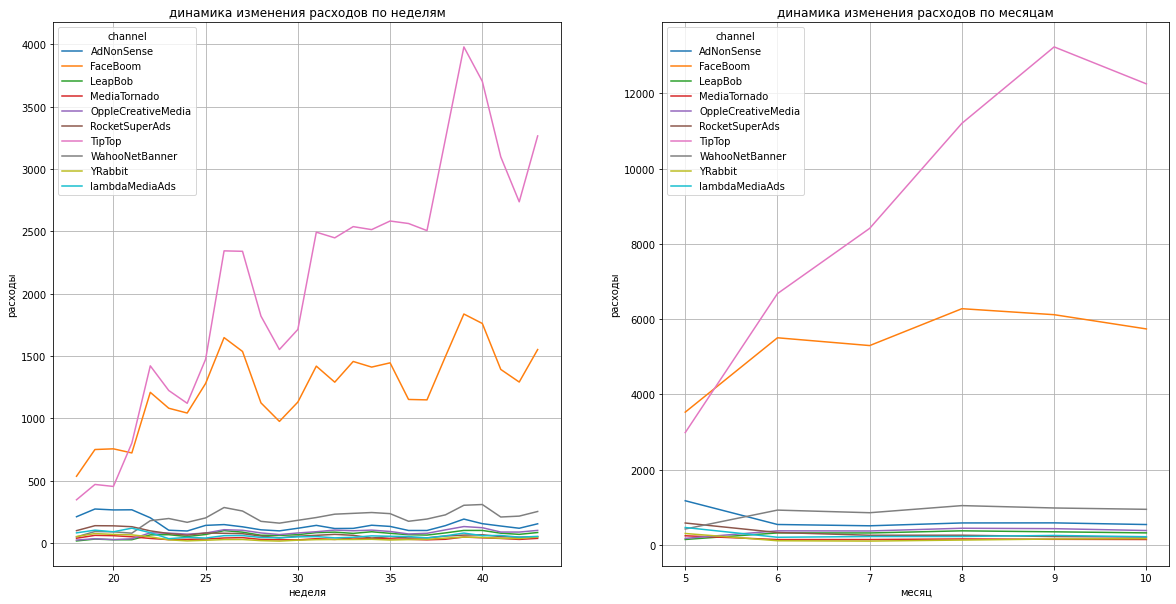

In [25]:
costs['week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

plt.figure(figsize=(20, 10))

costs.pivot_table(
    index='week', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 1))

plt.title('динамика изменения расходов по неделям')
plt.xlabel('неделя')
plt.ylabel('расходы')

costs.pivot_table(
    index='month', columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, ax=plt.subplot(1, 2, 2))

plt.title('динамика изменения расходов по месяцам')
plt.xlabel('месяц')
plt.ylabel('расходы')

plt.show()

Наибольшие расходы имеют TipTop и FaceBoom

#### Нахожу сколько в среднем стоило привлечение одного пользователя (CAC) 

In [26]:
print(
    profiles.groupby('channel')
    .agg({'user_id':'nunique', 'acquisition_cost':'mean'})
    .sort_values(by='acquisition_cost', ascending=False)
)

                    user_id  acquisition_cost
channel                                      
TipTop                19561          2.799003
FaceBoom              29144          1.113286
AdNonSense             3880          1.008054
lambdaMediaAds         2149          0.724802
WahooNetBanner         8553          0.602245
RocketSuperAds         4448          0.412095
OppleCreativeMedia     8605          0.250000
YRabbit                4312          0.218975
MediaTornado           4364          0.218717
LeapBob                8553          0.210172
organic               56439          0.000000


Средняя стоимость привлечения одного пользователя:

TipTop  2,79 $ 

FaceBoom 1,1 $

AdNonSense 1 $

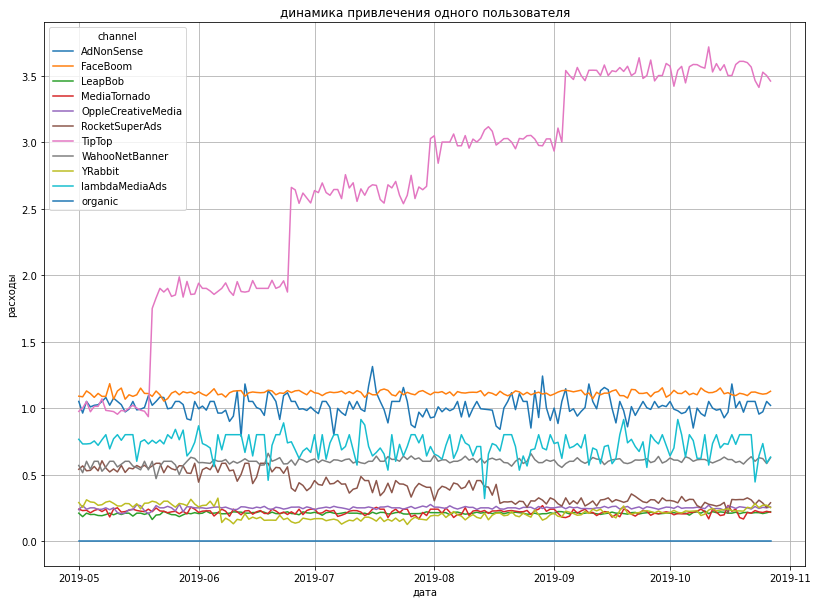

In [27]:
plt.figure(figsize=(30, 10))

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, ax=plt.subplot(1, 2, 1))

plt.title('динамика привлечения одного пользователя')
plt.xlabel('дата')
plt.ylabel('расходы')

plt.show()

Из графика следует что самые дорогие пользователи приходят из TipTop, что неоправданно дорого

Самым дорогим каналом является TipTop. Изходя из графика динамики привлечения пользователей видно что цена менялась резкими скачками почти каждый месяц

FaceBoom имеет стабильную цену в районе 1 $

AdNonSense и lambdaMediaAds имеют постоянные колебания цены примерно 20 % в обе стороны

Общая сумма расходов на маркетинг составляет 105 497 $, большая часть из которых направлена на TipTop и FaceBoom

### 5. Оценка окупаемости рекламы

#### Определяю момент и горизонт танализа, исключаю органические привлечения пользователей

In [28]:
observation_date = datetime(2019, 11, 1).date()

horizon_days = 14

profiles = profiles.query('channel != "organic"')

#### Считаю и строю графики для LTV, CAC и ROI

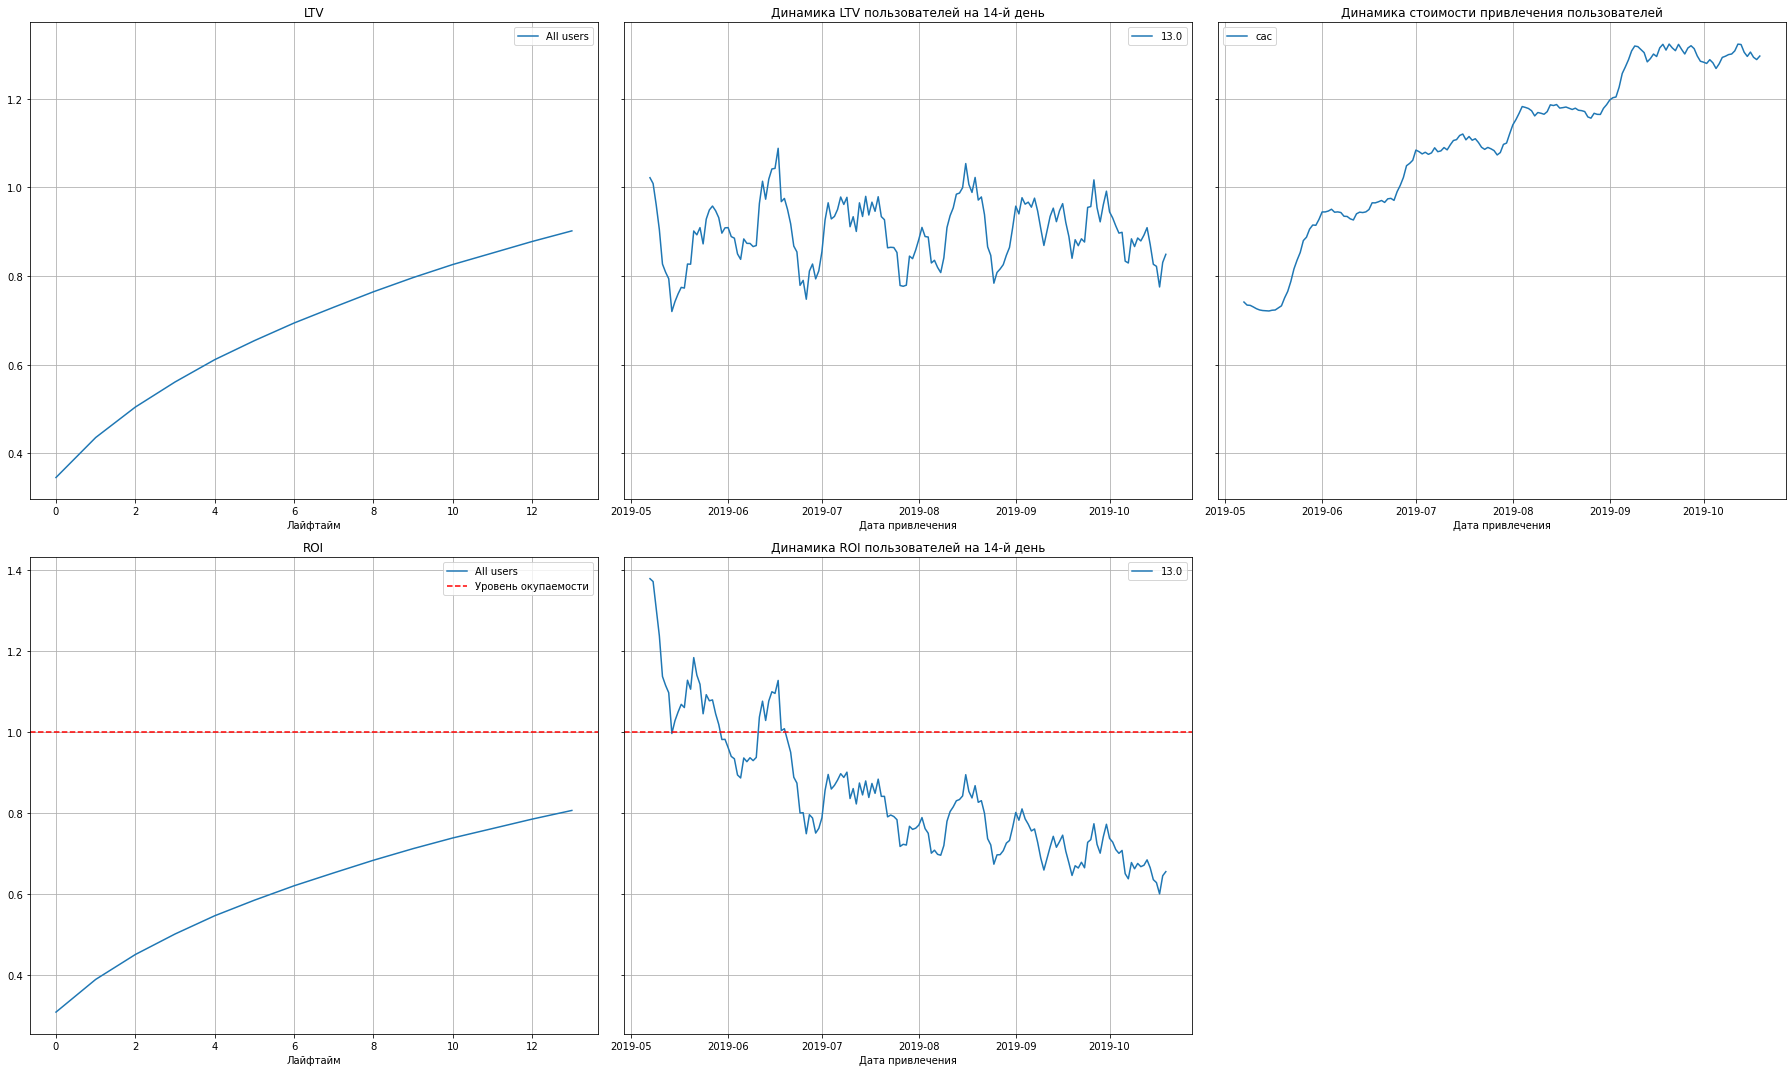

In [29]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Судя по графикам видно что реклама не окупается, в начале рекламной кампании ROI имел положительный результат, затем наблюдаем снижающийся тренд, с пиком в середине июня

#### Строю график для конверсии

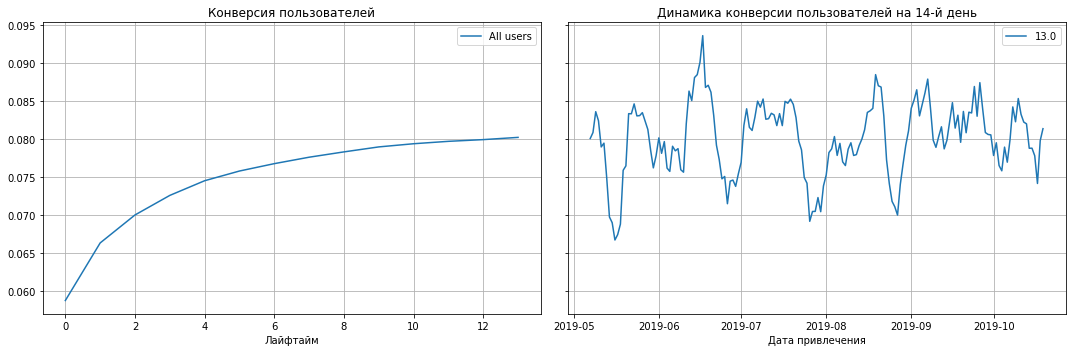

In [30]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия растет до 80% далее стопорится, динамика имеет переодические просадки и отмеченный ранее пик в середине июня

#### Строю график для удержания пользователей

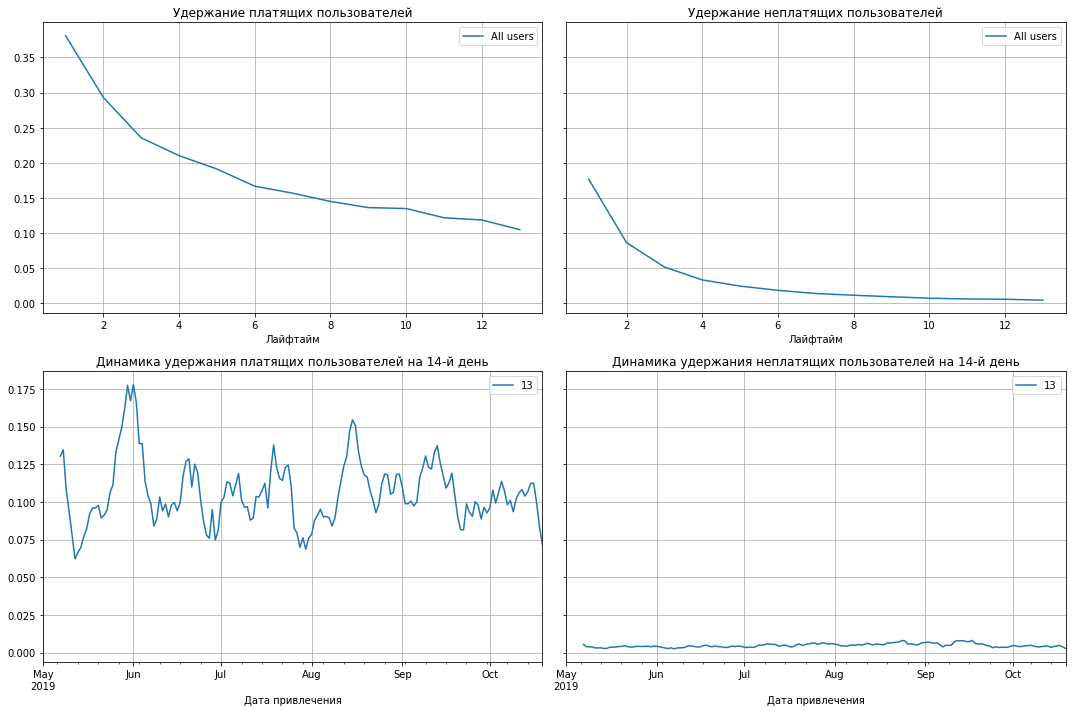

In [31]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание уменьшается со временем, мне кажется что-то произошло в середине июня, либо это общая тенденция

#### Считаю и строю графики для LTV, CAC и ROI с разбивкой по устройствам

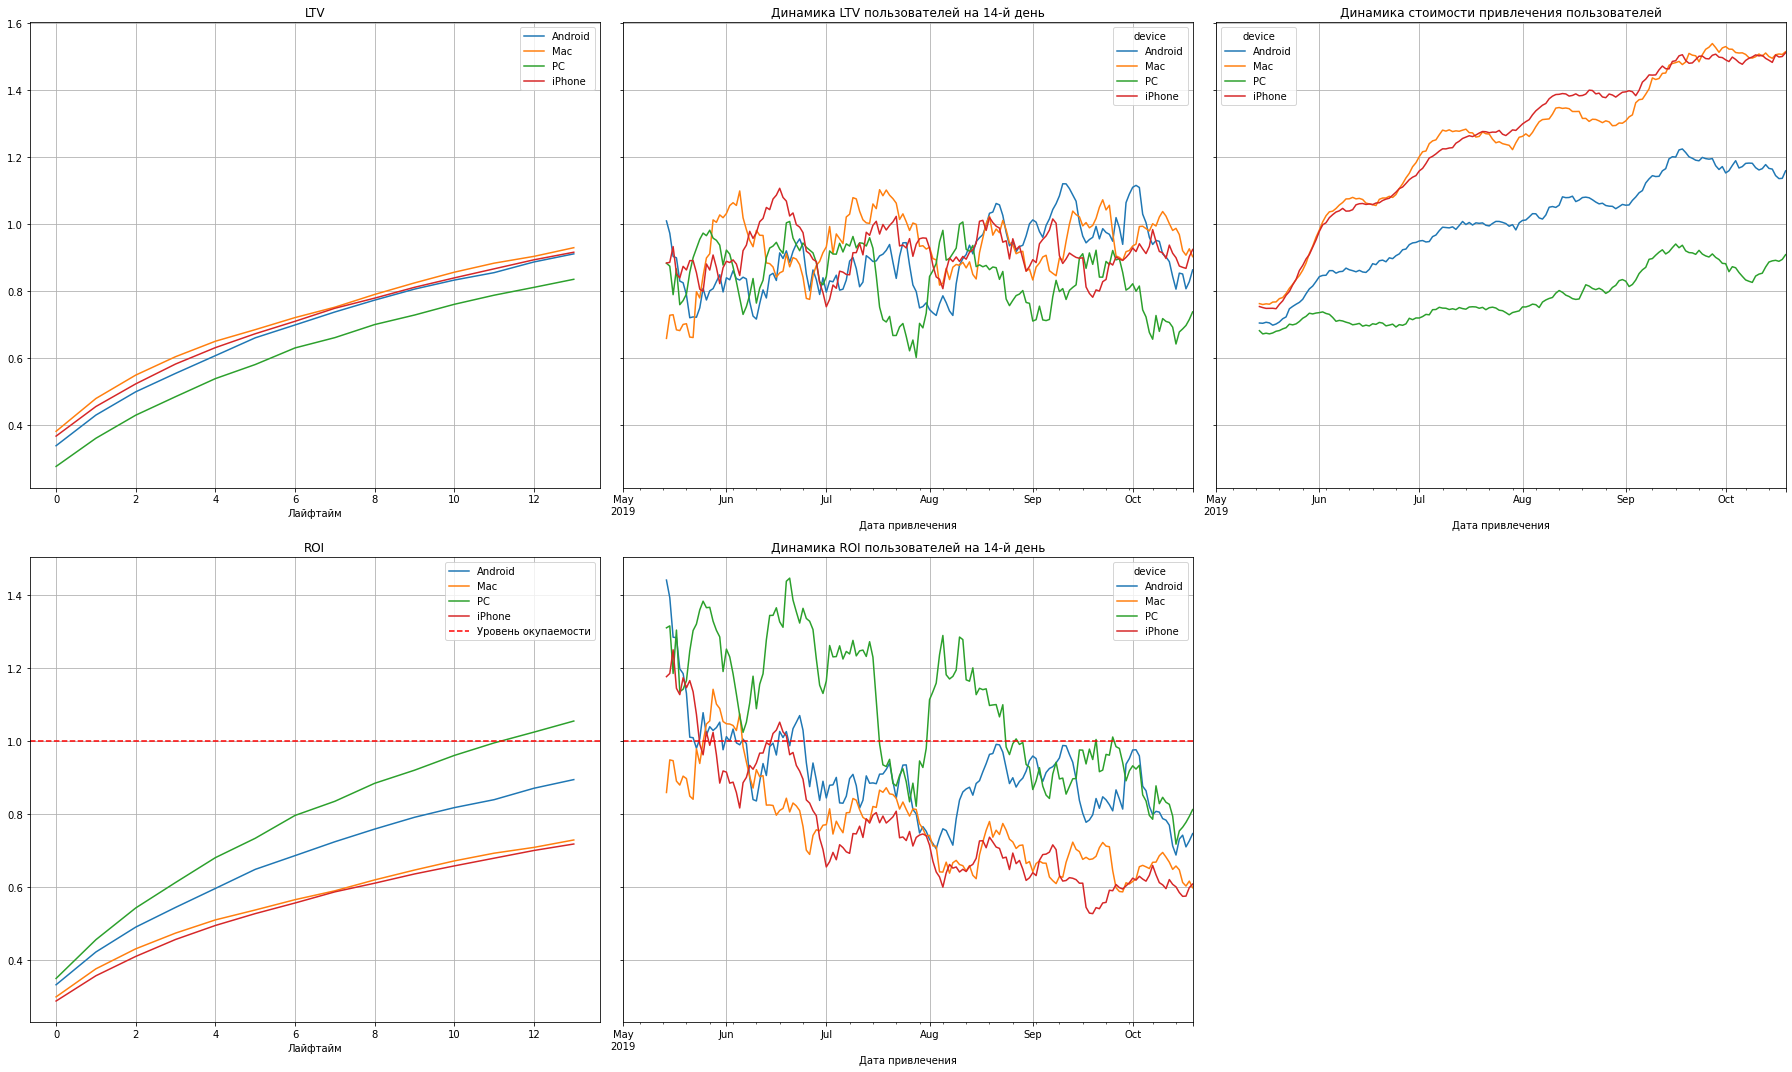

In [32]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По LTV отстает PC, но у этой группы самая низкая стоимость привлечения и положительный ROI. ROI для яблочных пользователей так и не был достигнут

#### Считаю и строю графики для конверсии с разбивкой по устройствам

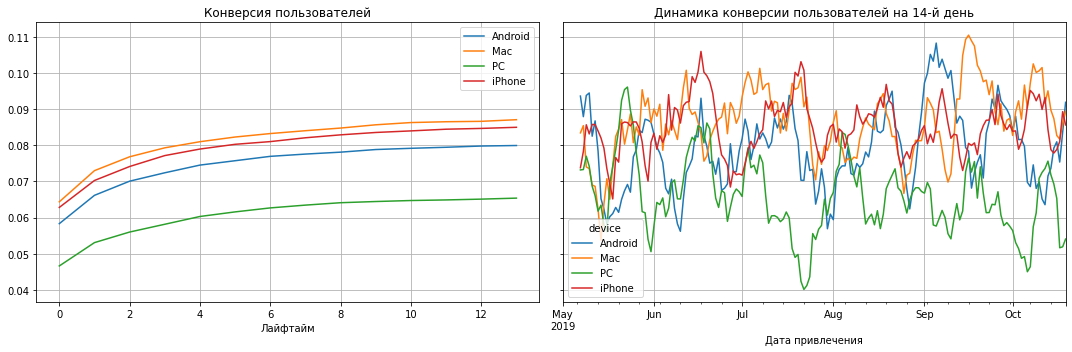

In [33]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Mac, iPhone конвертируются лучше всего PC хуже всего

#### Считаю и строю графики для удержания с разбивкой по устройствам

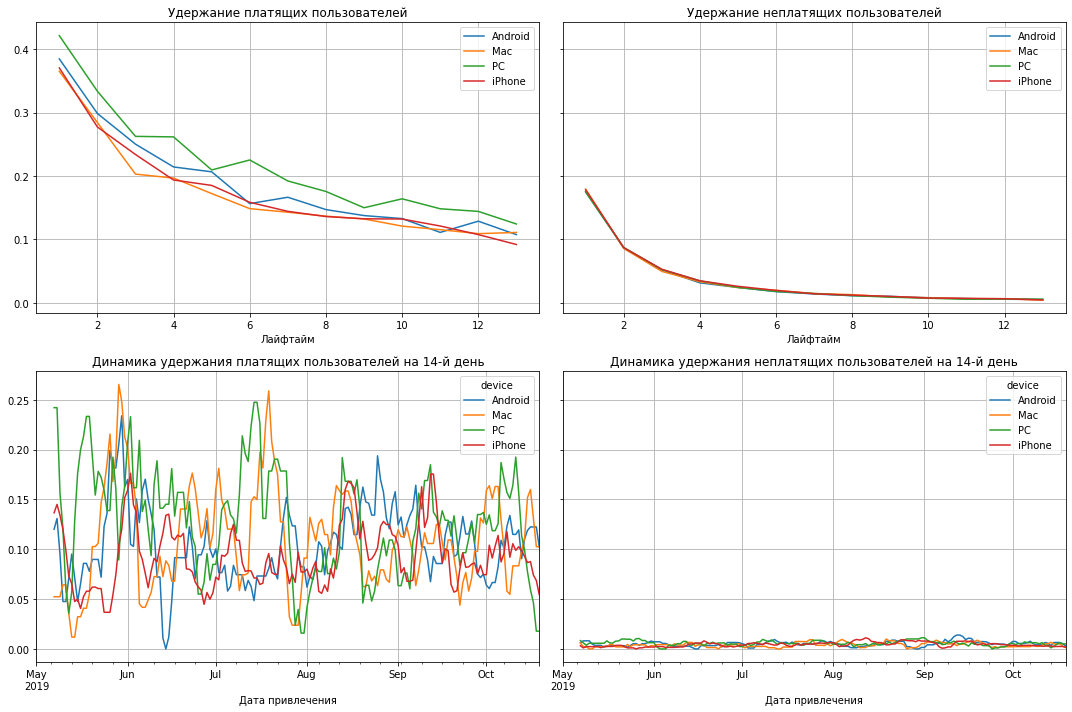

In [34]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание лучше у PC и Android

#### Считаю и строю графики для LTV, CAC и ROI с разбивкой по странам

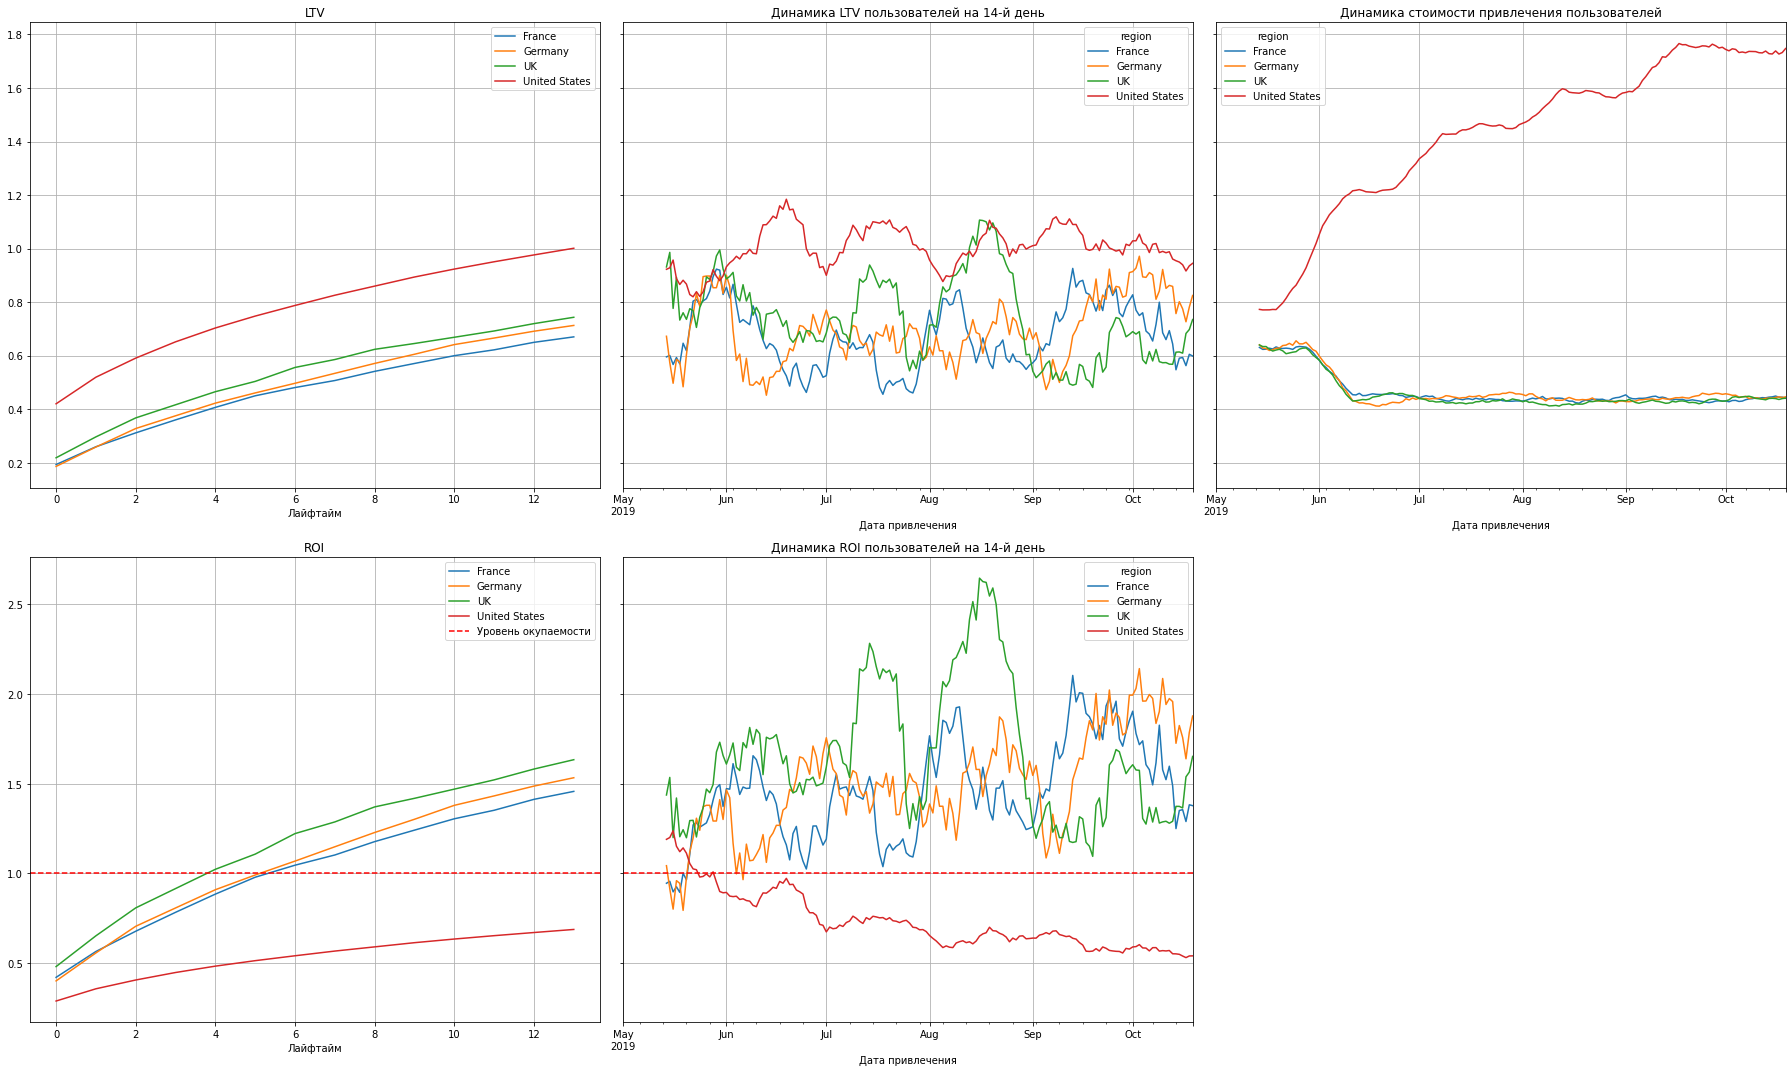

In [35]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Самые дорогие пользователи из США, я бы сказал неоправданно дорогие, по остальным странам все неплохо

На первомм месте по окупаемости находится Великобритания, США же даже на 80 % не окупает вложенных средств

#### Считаю и строю графики для конверсии с разбивкой по странам

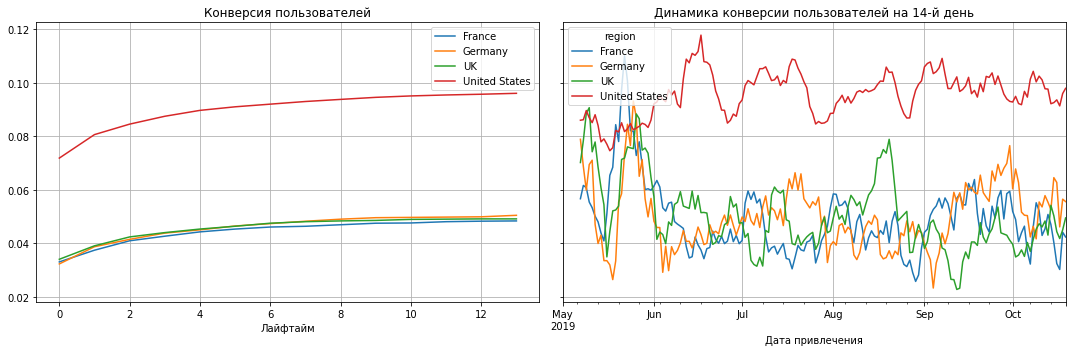

In [36]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Американская конверсия гораздо выше

#### Считаю и строю графики для удержания с разбивкой по странам

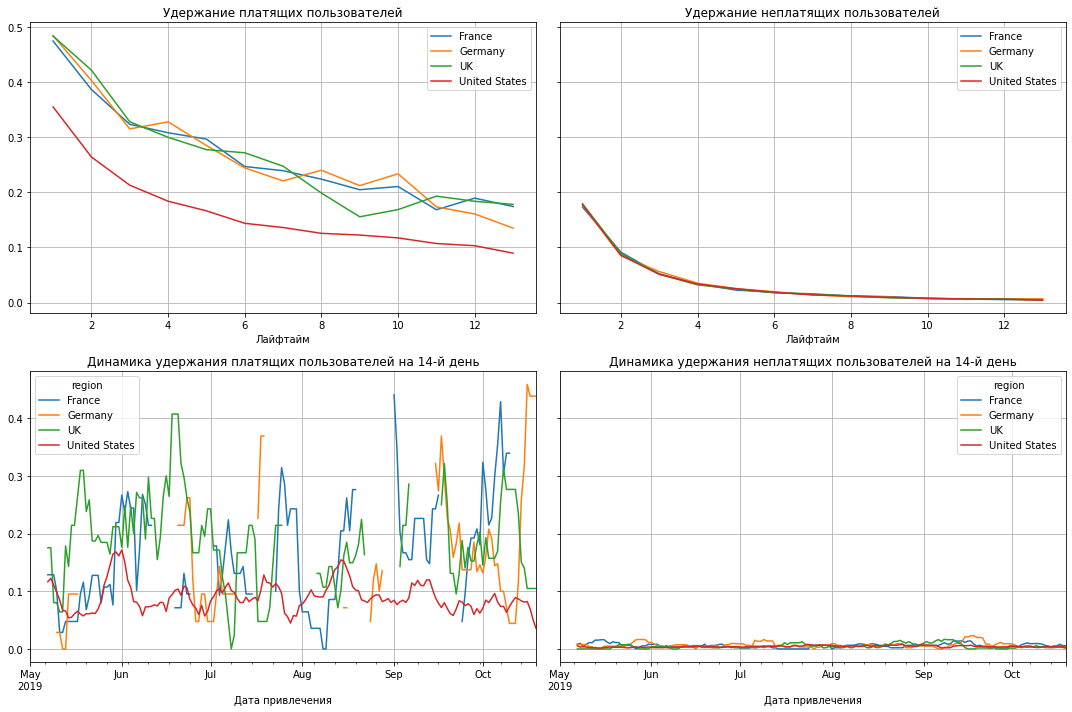

In [37]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей из США хуже всего

#### Считаю и строю графики для LTV, CAC и ROI с разбивкой по рекламным каналам

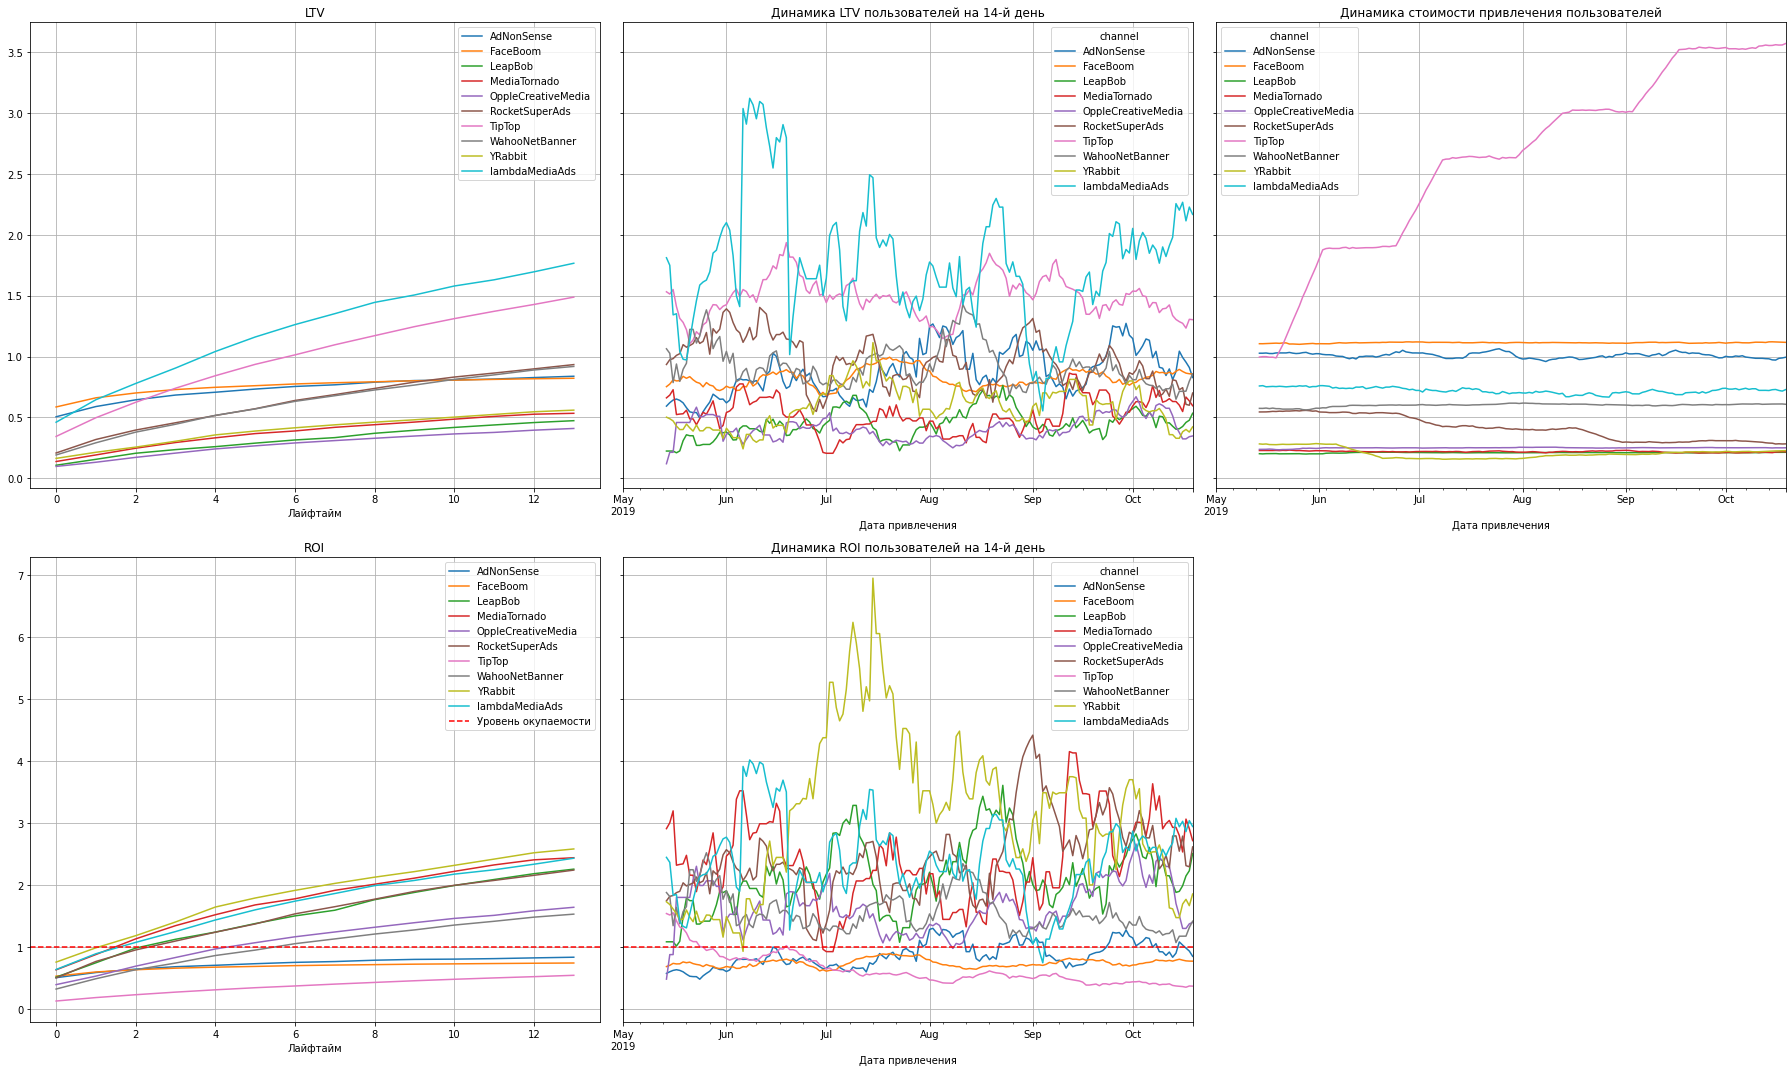

In [38]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Из графиков следует, что все каналы привлечения, с наибольшим числом пользователей, не возвращают вложенных в них средств 

Не окупаются самые дорогостоящие каналы, такие как TipTop, FaceBoom, AdNonSense. TipTop регулярно повышали цены из-за этого стоимость привлечения повышалась

#### Считаю и строю графики для конверсии с разбивкой по рекламным каналам

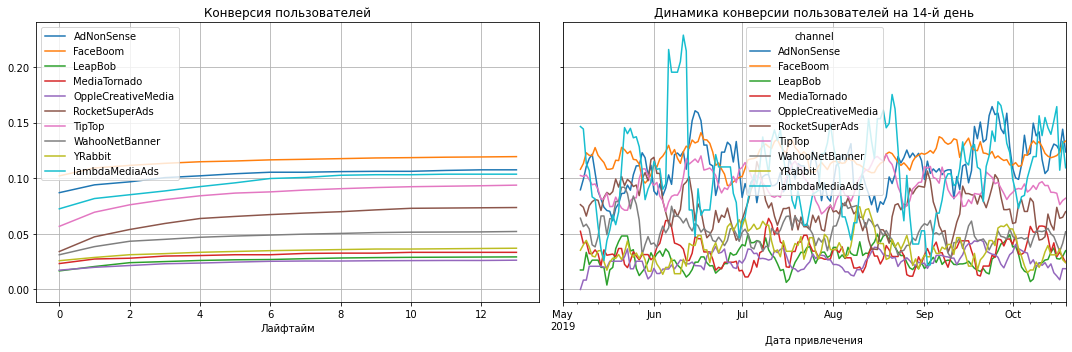

In [39]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

FaceBoom имеет самую высокую конверсию сопоставимую с AdNonSense и lambdaMediaAds

#### Считаю и строю графики для удержания с разбивкой по рекламным каналам

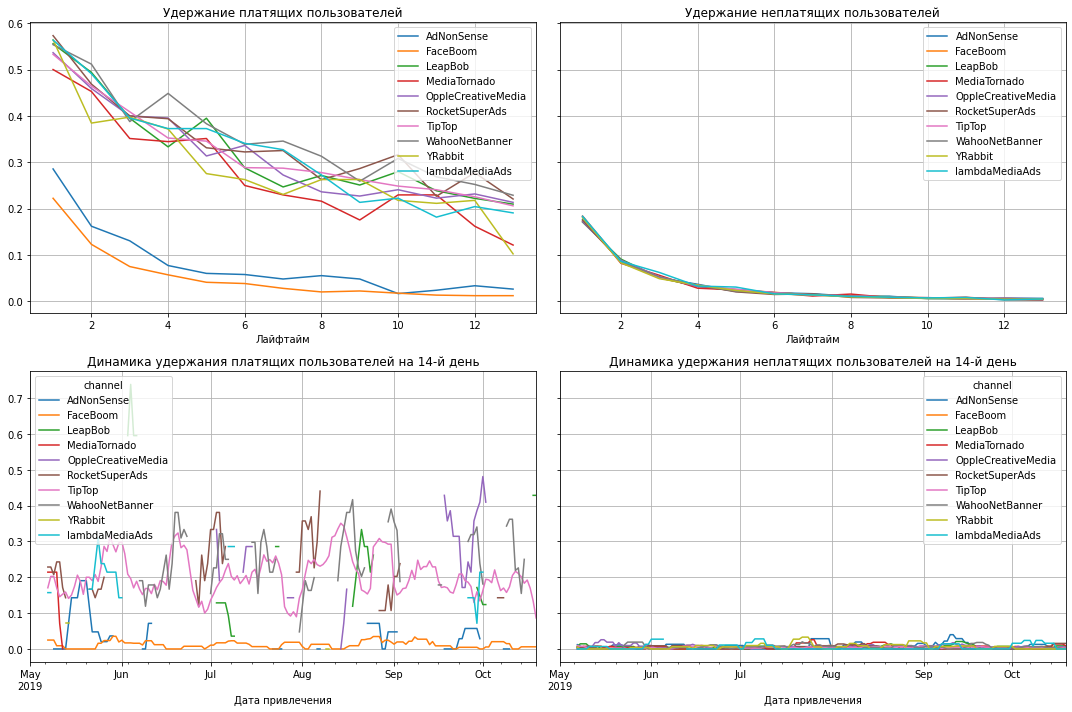

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

FaceBoom и AdNonSense имеют наихудшее удержание

#### Ответы на вопросы

1. Реклама не окупается

2. Владельцы устройств Apple и жители США негативно влияют на общие показатели из-за своей дороговизны. TipTop и FaceBoom так же являются неретабельными каналам

3. Проблема окупаемости вызвана вложением средств в неоправданно дорогие источники

Рекомендация:

Стоит перенаправить рекламный бюджет на страны с показателем ROI выше 1.

Следует развить следующие платформы: PC и Android  

Привлечь новых клиентов из таких регионов как: Великобритания, Германия и франция

Попробовать вложить средва в следующие каналы привлечения: LamdaMediaAds, RocketSuperAds, WahooNetBanner 

### Вывод

Основной причиной неэффективности привлечения пользователей, по моему мнению является неверное распределение рекламных бюджетов, слишком много средств направлено на дорогостоящие источники, возможно, что при поверхностном анализе они кажутся наиболее привлекательными, учитывая их высокую конверсию, но выводы такого анализа являютя ошибочными. В действительности такое распределение бюджета перетягивает одеяло с более дешевых, но не менее эффективных источников, поэтому предлагаю перераспределить бюджет следующим образом.

Рекомендация:

Стоит перенаправить рекламный бюджет на страны с показателем ROI выше 1.

Следует развить следующие платформы: PC и Android

Привлечь новых клиентов из таких регионов как: Великобритания, Германия и франция

Попробовать вложить средва в следующие каналы привлечения: LamdaMediaAds, RocketSuperAds, WahooNetBanner 

Источники, первые указанные в перечислении считаю приоритетными.

В США слишком дорогие пользователи, не смотря на высокую конверсию они слишком быстро уходят не успевая потратить достаточно

Канал TipTop регулярно повышал цены, что негативно сказывалось на окупаемости

Каналы FaceBoom, AdNonSense, не смотря на высокую конверсию имеют самые низкие показатели удержания, пользователи уходят

Пользователей с PC тяжелее конвертировать, но они лучше удерживаются и единственные имеют положительные показатели окупаемости
